In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Plotgröße festlegen
mpl.rcParams['figure.figsize'] = (10, 7)

### Daten definieren

In [2]:
# Anzahl gehörter Info-/Biovorlesungen
informatik = np.array([0, 0, 2, 3, 4, 4, 4, 5, 6, 7])
bio = np.array([0, 1, 1, 2, 2, 4, 5, 5, 6, 6])
X = np.c_[informatik, bio]

# je größer die Zahl, desto größer das Interesse
y = np.array([0.7, 1.2, 2.5, 3, 2.8, 5.1, 6.7, 7.38710581, 8, 9.8])

X_0 = X[y == 0] # alle Datenpunkte mit y = 0
X_1 = X[y == 1] # alle Datenpunkte mit y = 1

### Daten aufteilen

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12345)

### Daten visualisieren (2D)

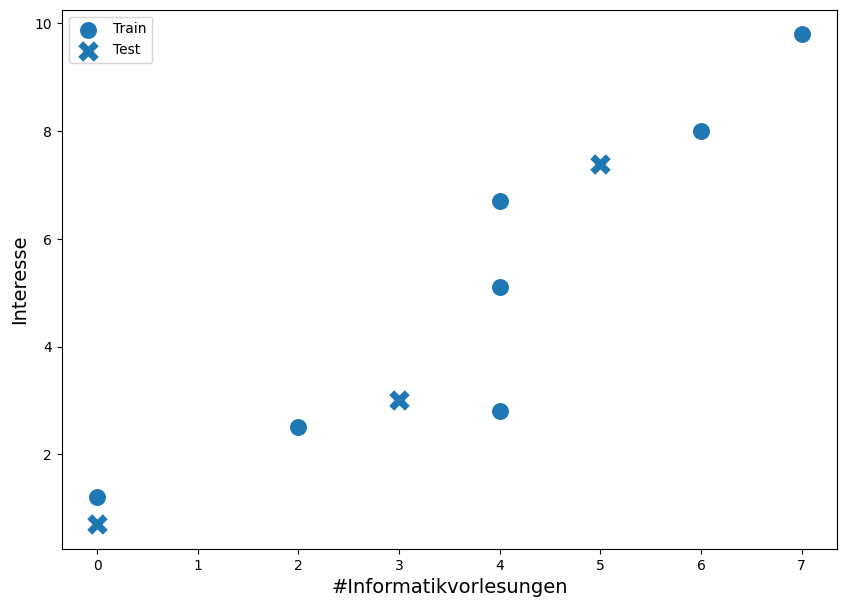

In [5]:
plt.scatter(X_train[:,0], y_train, color='#1f77b4', label="Train", s=125)
plt.scatter(X_test[:,0], y_test, marker="x", color='#1f77b4', label="Test", s=125, linewidth=5)
plt.xlabel("#Informatikvorlesungen", fontsize=14)
plt.ylabel("Interesse", fontsize=14)
plt.legend()

### Vorhersage

In [6]:
#Fehlerfunktion: MSE
def mse(y, y_predicted):
    error = y-y_predicted
    loss = 1/(y.size) * np.dot(error.T, error)
    return loss

class LinearRegression():
    def __init__(self):
        self.theta = None

    def _add_intercept_ones(self,X):
        intercept_ones = np.ones((len(X),1)) # results in array( [ [1],..,[1] ] )
        X_b = np.c_[intercept_ones,X]
        return X_b

    def fit(self, X, y):
        self.theta = np.random.rand(X.shape[-1])
        X_b = self._add_intercept_ones(X) # we now add the additional ones as a new column to our X
        theta_optimal = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y) # the normal equation
        self.theta = theta_optimal

    def predict(self, X):
        if type(self.theta) == type(None):
            print("Bitte zuerst trainieren!")
        else:
            return np.dot(self._add_intercept_ones(X), self.theta)

### Vergleich unserer Implementierung vs sklearn (2D)

In [7]:
from sklearn.metrics import mean_squared_error

In [8]:
linreg = LinearRegression()
linreg.fit(X_train[:,0], y_train)

sklearn_error = mean_squared_error(y_test, linreg.predict(X_test[:,0]))
our_error = mse(y_test, linreg.predict(X_test[:,0]))
print(f"sklearn-MSE-Funktion: {sklearn_error:.5f} | unsere MSE-Funktion: {our_error:.5f}")

sklearn-MSE-Funktion: 0.65457 | unsere MSE-Funktion: 0.65457


### Vergleich unserer Implementierung vs. sklearn (2D, grafisch)

In [9]:
from sklearn.linear_model import LinearRegression as SKLinearRegression

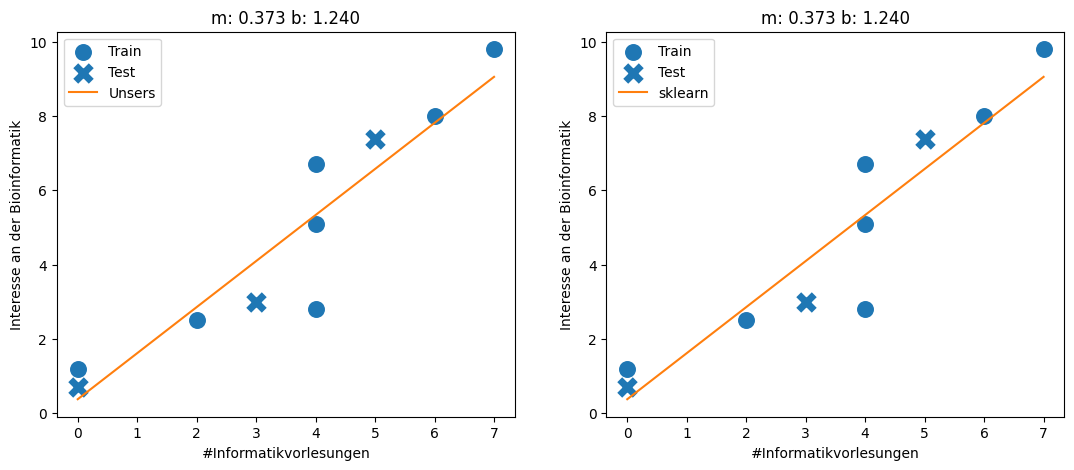

In [10]:
fig, ax = plt.subplots(1,2, figsize=(13,5))
our_linreg = LinearRegression()
sklearn_linreg = SKLinearRegression()

models = [("Unsers",our_linreg), ("sklearn",sklearn_linreg)]

for idx, (name,model) in enumerate(models):
    model.fit(X_train[:,0][...,np.newaxis],y_train)

    ax[idx].scatter(X_train[:,0], y_train, color='#1f77b4', label="Train", s=125)
    ax[idx].scatter(X_test[:,0], y_test, marker="x", color='#1f77b4', label="Test", s=125, linewidth=5)

    ax[idx].plot([0,7 ], model.predict([[0],[7]]), color='#ff7f0e', label=name)
    if name=="Unsers":
        ax[idx].set_title(f"m: {model.theta[0]:.3f} b: {model.theta[1]:.3f}")
    else:
        ax[idx].set_title(f"m: {model.intercept_:.3f} b: {model.coef_[0]:.3f}")
    
    ax[idx].set_xlabel("#Informatikvorlesungen")
    ax[idx].set_ylabel("Interesse an der Bioinformatik")
    ax[idx].legend()
    
plt.show()

### Daten visualisieren (3D)

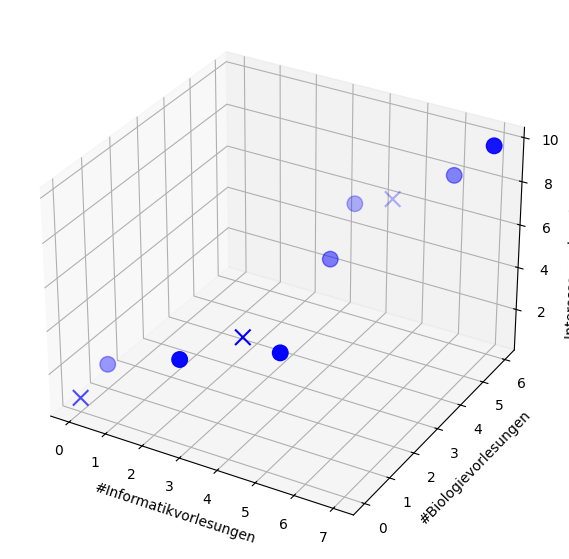

In [11]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1, projection='3d')

ax.scatter(X_train[:,0], X_train[:,1], y_train, color='blue', label="Train", s=125)
ax.scatter(X_test[:,0], X_test[:,1], y_test, marker="x", color='blue', label="Test", s=125)

ax.set_xlabel("#Informatikvorlesungen")
ax.set_ylabel("#Biologievorlesungen")
ax.set_zlabel("Interesse an der Bioinformatik")
plt.show()

### Vergleich unserer Implementierung vs. sklearn (3D)

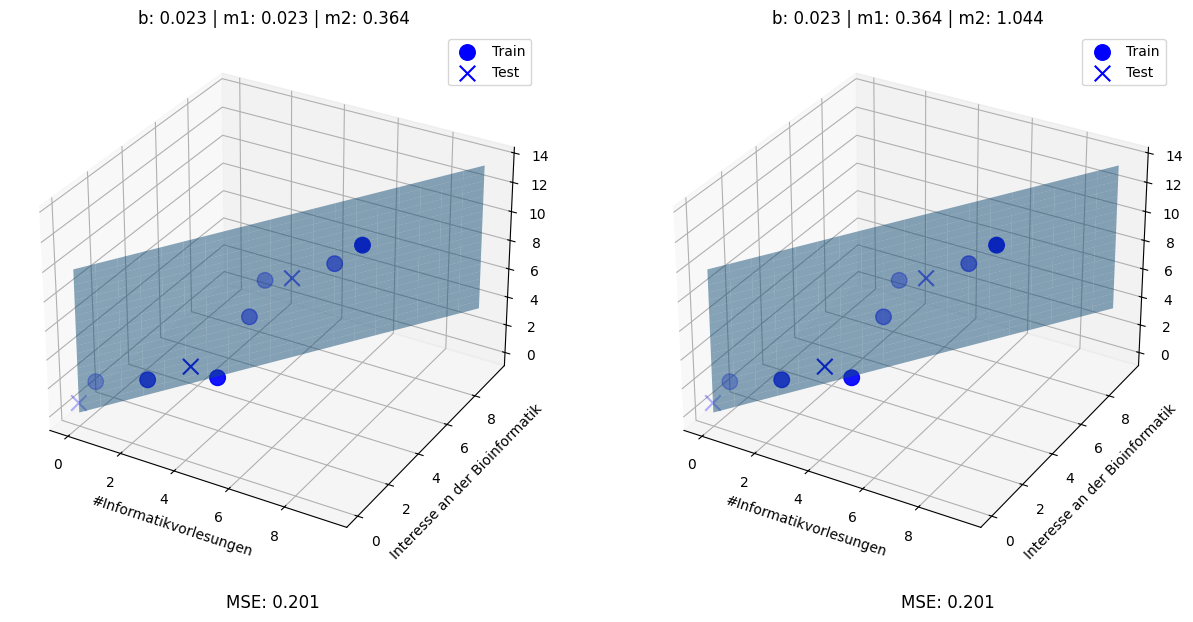

In [12]:
fig = plt.figure(figsize=(15,7))
ax = []
ax.append(fig.add_subplot(1,2,1, projection='3d'))
ax.append(fig.add_subplot(1,2,2, projection='3d'))

our_linreg = LinearRegression()
sklearn_linreg = SKLinearRegression()

models = [("Unsers",our_linreg), ("sklearn",sklearn_linreg)]

for idx, (name,model) in enumerate(models):
    model.fit(X_train,y_train)

    ax[idx].scatter(X_train[:,0], X_train[:,1], y_train, color='blue', label="Train", s=125)
    ax[idx].scatter(X_test[:,0], X_test[:,1], y_test, marker="x", color='blue', label="Test", s=125)

    # plot prediction plane
    X = np.arange(0, 10, 0.5)
    Y = np.arange(0, 10, 0.5)
    Z = np.array([[ model.predict([[x,y]]) for x in X] for y in Y]).squeeze()

    # Plot the surface.
    ax[idx].plot_surface(X, Y, Z, linewidth=0, alpha=0.5, zorder=-10)
    if name=="Unsers":
        ax[idx].set_title(f"b: {model.theta[0]:.3f} | m1: {model.theta[0]:.3f} | m2: {model.theta[1]:.3f}")
    else:
        ax[idx].set_title(f"b: {model.intercept_:.3f} | m1: {model.coef_[0]:.3f} | m2: {model.coef_[1]:.3f}")
    
    ax[idx].set_xlabel("#Informatikvorlesungen")
    ax[idx].set_ylabel("Interesse an der Bioinformatik")
    ax[idx].legend()
    
plt.figtext(0.3,0.05, f"MSE: {mse(our_linreg.predict(X_test), y_test):.3f}",fontsize=12,ha='center')
plt.figtext(0.75,0.05, f"MSE: {mse(sklearn_linreg.predict(X_test), y_test):.3f}",fontsize=12,ha='center')

    
plt.show()